<a href="https://colab.research.google.com/github/isshii/de4test/blob/master/LIME/Lime_VGG16.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# https://github.com/marcotcr/lime/blob/master/doc/notebooks/Tutorial%20-%20Image%20Classification%20Keras.ipynb を参考に

import os
import keras
from keras.applications import inception_v3 as inc_net
from keras.preprocessing import image
from keras.applications.imagenet_utils import decode_predictions
from skimage.io import imread
import matplotlib.pyplot as plt
from keras.applications import vgg16 as vgg16
from keras_applications.imagenet_utils import preprocess_input as preprocess_input

%matplotlib inline
import numpy as np
print('Notebook run using keras:', keras.__version__)

Notebook run using keras: 2.2.5


In [0]:
from keras_applications.imagenet_utils import preprocess_input as preprocess_input
import os, re
import random
import keras
# models
from keras.applications import inception_v3 as inc_net
from keras.applications import resnet50 as resnet50
from keras.applications import vgg16 as vgg16
from keras.applications.vgg16 import preprocess_input, decode_predictions
from keras.preprocessing import image
from keras.applications.imagenet_utils import decode_predictions
from keras.layers import Input
from keras.preprocessing import image

from skimage.io import imread
import matplotlib.pyplot as plt
import numpy as np
print('Notebook run using keras:', keras.__version__)

Notebook run using keras: 2.2.5


In [0]:
inet_model = inc_net.InceptionV3()
vgg16_model = vgg16.VGG16(include_top=True, weights='imagenet', input_tensor=None, input_shape=None)


In [0]:
def transform_img_fn(path_list, target_size=(299, 299)):
    out = []
    for img_path in path_list:
        img = image.load_img(img_path, target_size=target_size)
        x = image.img_to_array(img)
        x = np.expand_dims(x, axis=0)
        x = inc_net.preprocess_input(x)
        out.append(x)
    return np.vstack(out)

In [0]:
# ドライブをマウントする
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


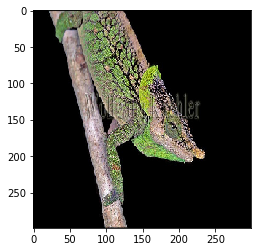

In [0]:
images =  transform_img_fn(["/content/gdrive/My Drive/ColabNotebooks/test4ai/data/ImageNet/single/ILSVRC2012_test_00001582.JPEG"])
plt.imshow(images[0] / 2 + 0.5)

ValueError: ignored

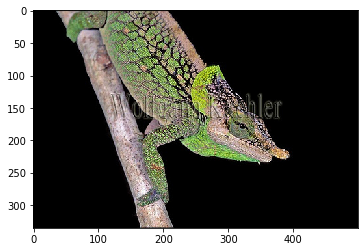

In [0]:
# inceptionv3
#images = transform_img_fn([os.path.join('data','cat_mouse.jpg')])
images =  transform_img_fn(["/content/gdrive/My Drive/ColabNotebooks/test4ai/data/ImageNet/single/ILSVRC2012_test_00001582.JPEG"])
# I'm dividing by 2 and adding 0.5 because of how this Inception represents images
plt.imshow(images[0] / 2 + 0.5)
preds = inet_model.predict(images)
for x in decode_predictions(preds)[0]:
    print(x)

In [0]:
vgg16_model = vgg16.VGG16(include_top=True, weights='imagenet', input_tensor=None, input_shape=None)

In [0]:
def load_image(filename):
  img = image.load_img(filename, target_size=(224, 224))
  return image.img_to_array(img)

In [0]:
# vgg16
images4vgg = [
  "/content/gdrive/My Drive/ColabNotebooks/test4ai/data/ImageNet/single/ILSVRC2012_test_00001582.JPEG"
 # "/content/gdrive/My Drive/ColabNotebooks/test4ai/data/ImageNet/single_de_output/occl_African_chameleon.png"
]

x = np.zeros((len(images4vgg), 224, 224, 3))

for i in range(0, len(images4vgg)):
  x[i] = load_image(images4vgg[i])

In [0]:
pred = vgg16_model.predict(preprocess_input(x))
print('pred.shape={shape}'.format(shape=pred.shape))

top = decode_predictions(pred, top=5)
for i in range(0, len(top)):
  print('{i}:'.format(i=i))
  for j in range(0, len(top[i])):
    name, desc, score = top[i][j]
    print('  {rank}    {desc} {score:02.1f}%'
	      .format(rank=j+1, desc=desc, score=score*100))



pred.shape=(1, 1000)
0:
  1    African_chameleon 100.0%
  2    triceratops 0.0%
  3    banded_gecko 0.0%
  4    frilled_lizard 0.0%
  5    American_chameleon 0.0%


In [0]:
#lime  インストール
! pip install lime
%load_ext autoreload
%autoreload 2
import os,sys
try:
    import lime
except:
    sys.path.append(os.path.join('..', '..')) # add the current directory
    import lime
from lime import lime_image

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [0]:
explainer = lime_image.LimeImageExplainer()

In [0]:
%%time
# Hide color is the color for a superpixel turned OFF. Alternatively, if it is NONE, the superpixel will be replaced by the average of its pixels
explanation = explainer.explain_instance(images[0], inet_model.predict, top_labels=5, hide_color=0, num_samples=1000)

AttributeError: ignored

In [0]:
%%time
# Hide color is the color for a superpixel turned OFF. Alternatively, if it is NONE, the superpixel will be replaced by the average of its pixels
imagesVV =  transform_img_fn(["/content/gdrive/My Drive/ColabNotebooks/test4ai/data/ImageNet/single/ILSVRC2012_test_00001582.JPEG"], (224, 224))

vgg16_explanation = explainer.explain_instance(imagesVV[0], vgg16_model.predict, top_labels=5, hide_color=0, num_samples=1000)

CPU times: user 16min 45s, sys: 1.04 s, total: 16min 46s
Wall time: 8min 29s


In [0]:
from skimage.segmentation import mark_boundaries


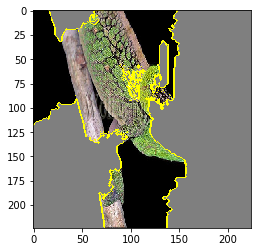

In [0]:
temp, mask = vgg16_explanation.get_image_and_mask(vgg16_explanation.top_labels[0], positive_only=True, num_features=5, hide_rest=True)
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))

In [0]:
print(mask)
print(mask.shape)

[[1 1 1 ... 0 0 0]
 [1 1 1 ... 0 0 0]
 [1 1 1 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
(224, 224)


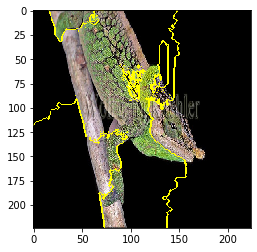

In [0]:
temp, mask = vgg16_explanation.get_image_and_mask(vgg16_explanation.top_labels[0], positive_only=True, num_features=5, hide_rest=False)
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))

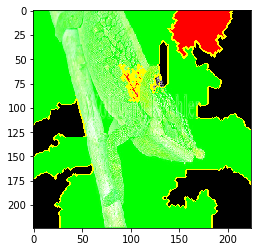

In [0]:
temp, mask = vgg16_explanation.get_image_and_mask(vgg16_explanation.top_labels[0], positive_only=False, num_features=20, hide_rest=False)
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))